<a href="https://colab.research.google.com/github/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/blob/main/%D0%9E%D0%B1%D1%80%D0%BE%D0%B1%D0%BA%D0%B0_%D1%82%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B1%D1%96%D0%BE%D0%BC%D0%B5%D0%B4%D0%B8%D1%87%D0%BD%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9A%D0%9F_%E2%84%964-5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №4-5

###Імпорт основних модулів

In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. Відібрати на Kaggle.com набір даних, який містить я мінімум 1 категоріальну змінну та одну кількісну.



In [381]:
melb = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/AnalysisBMD_YevtusenkoBS-25/Data/melb_data.csv")

In [382]:
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


 Видалимо пропуски наступною командою

In [383]:
melb = melb.dropna(subset=['BuildingArea'])
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


##2. На основі кількісної змінної(BuildingArea) згенеруємо нову змінну за правилом: кожен елемент стовпця (по черзі) множиться на випадкове значення від 1 до 5.

In [384]:
# Генерація нової змінної
np.random.seed(0) # Задаємо початкове значення для відтворюваності результатів
melb['NewBuildingArea'] = melb['BuildingArea'] * np.random.randint(1, 6, melb.shape[0])
melb[['BuildingArea', 'NewBuildingArea']].head()

,BuildingArea,NewBuildingArea
1,79.0,395.0
2,150.0,150.0
4,142.0,568.0
6,210.0,840.0
7,107.0,428.0


#3 Порівняти дві категорії з категоріальної змінної за алгоритмом:


In [385]:
melb[melb['Type'].isin(['h', 'u'])]
melb[['Type']]

,Type
1,h
2,h
4,h
6,h
7,h
...,...
13572,h
13573,h
13576,h
13578,h


In [386]:
melb[melb["Type"] == 'h']['BuildingArea'].shape

(4860,)

In [387]:
melb[melb["Type"] == 'u']['BuildingArea'].shape

(1584,)

In [388]:
melb["BuildingArea"].shape

(7130,)

##3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

In [389]:
from scipy.stats import kstest, norm

data = melb["BuildingArea"]
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")


Статистика тесту = 0.39643;
p = 0.00000
Дані не мають нормального розподілу


## 3.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [390]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4860,176.866248,650.556175
u,1584,80.737121,50.631211


## 3.4. Візуалізувати групи за допомогою ящичкових діаграм.

In [391]:
h = melb[melb["Type"] == "h"]["BuildingArea"]
u = melb[melb["Type"] == "u"]["BuildingArea"]

In [392]:
h.shape

(4860,)

In [393]:
u.shape

(1584,)

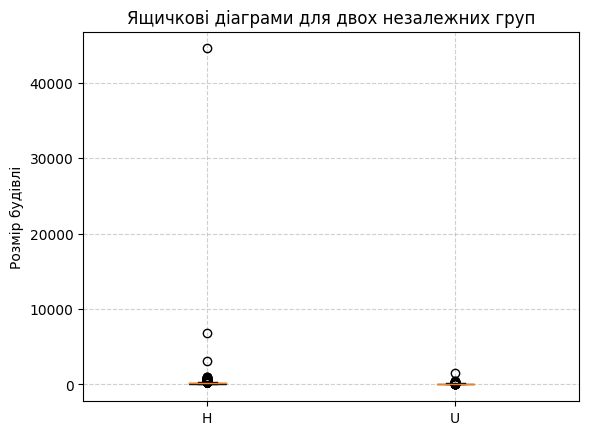

In [394]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Cпробуємо трохи покращити дані, використавши квантильний метод очищення даних від викидів

In [406]:
Q1 = melb['BuildingArea'].quantile(0.25)
Q3 = melb['BuildingArea'].quantile(0.75)
IQR = Q3 - Q1

# Визначення меж
low = Q1 - 1.5 * IQR
upp = Q3 + 1.5 * IQR

# Фільтрація
melb = melb[(melb['BuildingArea'] >= low) & (melb['BuildingArea'] <= upp)]

In [407]:
h = melb[melb["Type"] == "h"]["BuildingArea"]
u = melb[melb["Type"] == "u"]["BuildingArea"]

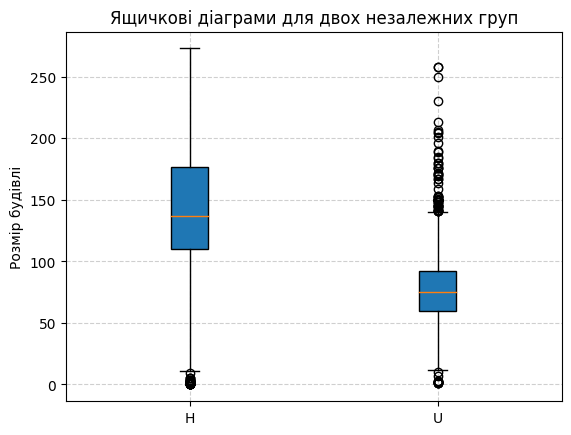

In [408]:
data = [h, u]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=["H", "U"])

# Покращення візуалізації
ax.set_title("Ящичкові діаграми для двох незалежних груп")
ax.set_ylabel ("Розмір будівлі")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [409]:
h.shape

(4408,)

In [410]:
u.shape

(1578,)

Після реалізації алгоритму очищення від викидів, бачимо, що це допомогло. Переконатись в цьому, можемо порівнявши 2 графіки або розміри даних `до/після`

## 3.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.(ОНОВЛЕНО)

In [412]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["BuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4408,145.099907,49.917026
u,1578,78.897719,30.060473


## 3.5. Сформувати нульову та альтернативну гіпотези.

Нульова гіпотеза (H₀): Немає статистично значущої різниці між середніми цінами будинків (h) та квартир (u).

Альтернативна гіпотеза (H₁): Існує статистично значуща різниця між середніми цінами будинків (h) та квартир (u).

## 3.6. Перевірити гіпотезу та зробити висновки про те, яка саме гіпотеза підтвердилась.

In [413]:
from scipy.stats import ttest_rel

In [414]:
n = min(len(u), len(h))

sample_h = h[:n]
sample_u = u[:n]

t_statistic, p_value = ttest_rel(sample_h, sample_u)

print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: 46.8306618419;
p-value: 0.0000000000


Отже, результати тесту показали, що p значення < 0.05, тому ми відкидаємо нульову гіпотезу та приймаємо альтернативну,  яка вказує на існування статистично значущої різниця між середніми розмірами будинків (h) та квартир (u)

# 4.Порівняти кількісну змінну з оригінального дата сету та згенеровану змінну за аналогічним алгоритмом.

##4.2 Перевірити розподіл на нормальність за допомогою будь-якого критерію та зробити відповідні висновки.

In [418]:
from scipy.stats import kstest, norm

data = melb["NewBuildingArea"]
# Розрахунок середнього значення і стандартного відхилення
mean = data.mean()
std = data.std()

# Виконання тесту Колмогорова-Смірнова
stat, p = kstest(data, 'norm', args=(mean, std))
print("Статистика тесту = %.5f;\np = %.5f" % (stat, p))

if p > 0.05:
    print("Дані мають нормальний розподіл")
else:
    print("Дані не мають нормального розподілу")

Статистика тесту = 0.08361;
p = 0.00000
Дані не мають нормального розподілу


## 4.3. Дати коротку характеристику кожній з груп: розрахувати кількість спостережень, середнє значення та стандартне відхилення.


In [420]:
melb["NewBuildingArea"].agg(["count", "mean", "std"])

count    6658.000000
mean      383.329210
std       254.101864
Name: NewBuildingArea, dtype: float64

In [419]:
melb_type = melb[melb["Type"].isin(["h", "u"])].groupby("Type")["NewBuildingArea"].agg(["count", "mean", "std"])
melb_type

,count,mean,std
Type,,,
h,4408,435.038064,264.515581
u,1578,234.549930,148.169739


In [415]:
before_data = melb["BuildingArea"]
after_data = melb["NewBuildingArea"]

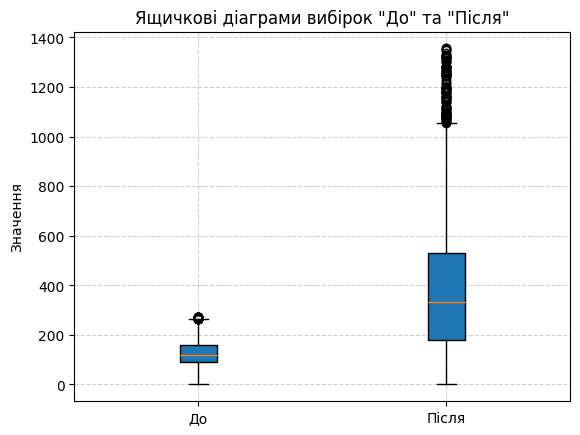

In [416]:
data = [before_data, after_data]
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, labels=['До', 'Після'])

# Покращення візуалізації
ax.set_title('Ящичкові діаграми вибірок "До" та "Після"')
ax.set_ylabel ('Значення')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [417]:
t_statistic, p_value = stats.ttest_rel(before_data, after_data)

print(f"Статистика тесту: {t_statistic:.10f};\np-value: {p_value:.10f}")

Статистика тесту: -93.3383481162;
p-value: 0.0000000000
